<a href="https://colab.research.google.com/github/Madhushri1216/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [43]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/dataset.csv')
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
# printing the last 5 rows of the dataframe
loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [46]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [47]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [48]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [49]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [50]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [53]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [54]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [55]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [56]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [57]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

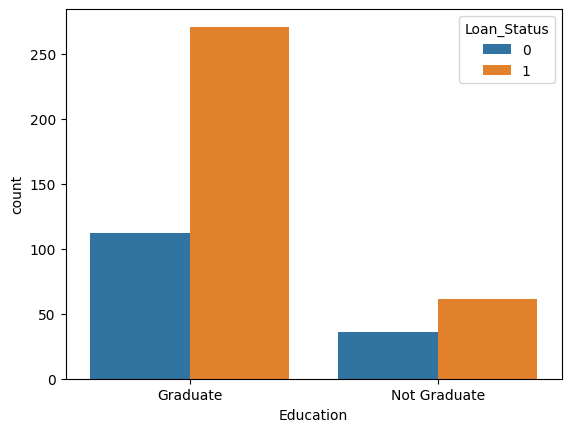

In [58]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

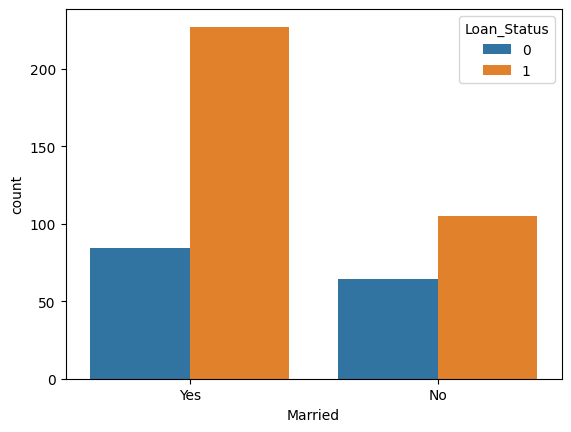

In [59]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [61]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [62]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [63]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [64]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [65]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [66]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [68]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [69]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [70]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [71]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[ 7,  8],
       [ 4, 29]])

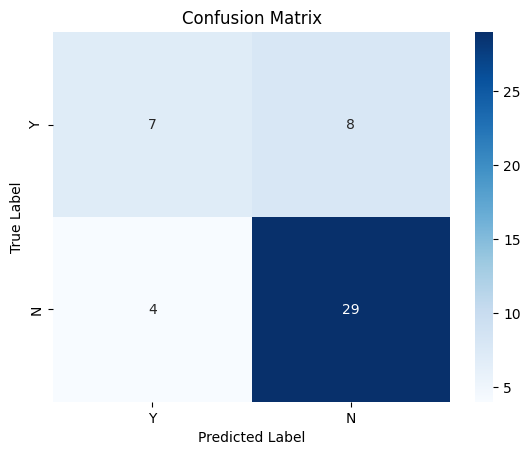

In [72]:
# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Y', 'N'], yticklabels=['Y', 'N'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()